In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dichroic_spectra = pd.read_csv(r'D:\CZI_scope\code\data\spectra\spectra - dichroic_md588.csv')
filter_spectra = pd.read_csv(r'D:\CZI_scope\code\data\spectra\spectra - excitation_filter_FELH0600.csv')
dichroic_spectra.columns = ('wavelength', 'transmission')
filter_spectra.columns = ('wavelength', 'transmission')

In [15]:
merged = dichroic_spectra.merge(filter_spectra, on='wavelength', how='inner')
merged = merged.rename(columns={
    'transmission_x': 'dichroic_transmission',
    'transmission_y': 'filter_transmission'
})

merged['product'] = (merged['dichroic_transmission']/100 * merged['filter_transmission']/100) * 100


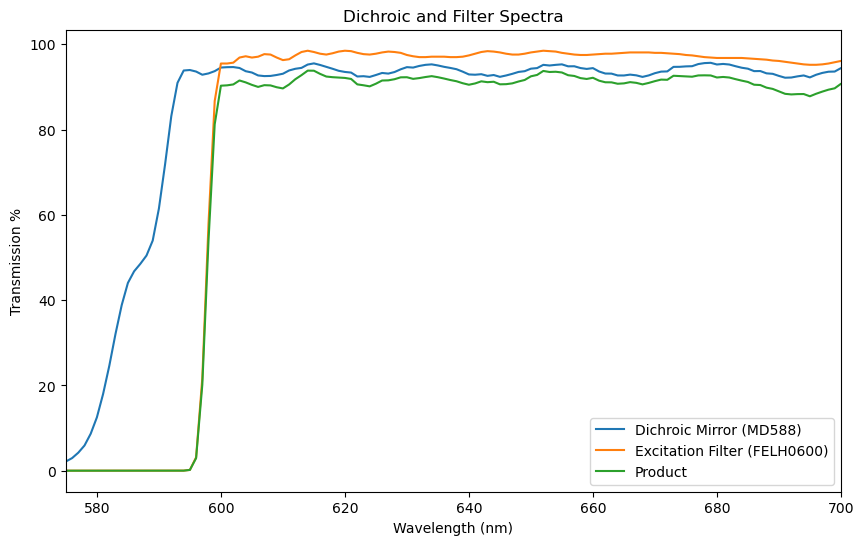

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(merged['wavelength'], merged['dichroic_transmission'], label='Dichroic Mirror (MD588)')
plt.plot(merged['wavelength'], merged['filter_transmission'], label='Excitation Filter (FELH0600)')
plt.plot(merged['wavelength'], merged['product'], label='Product')
plt.xlim(575, 700)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission %')
plt.title('Dichroic and Filter Spectra')
plt.legend()
plt.show()